<a href="https://colab.research.google.com/github/maminSilach/prakticheskoe/blob/main/Vinogradov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

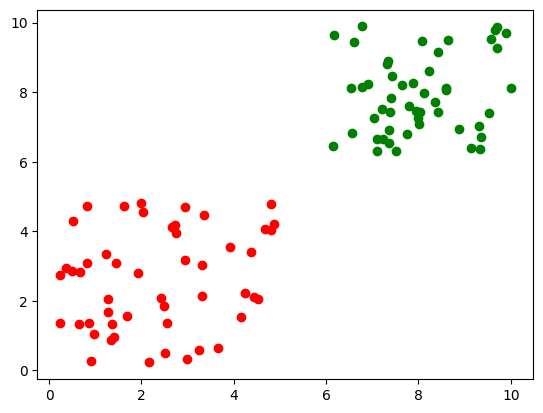

epoch: 0, error: -0.8444729565117197
epoch: 1, error: -0.725263263128445
epoch: 2, error: -0.6749531825314442
epoch: 3, error: -0.6544054186961601
epoch: 4, error: -0.6436093246968142
epoch: 5, error: -0.6357706941350858
epoch: 6, error: -0.6288579108213962
epoch: 7, error: -0.6222843110018746
epoch: 8, error: -0.6158810874787618
epoch: 9, error: -0.6095987383589891
epoch: 10, error: -0.6034217387437236
epoch: 11, error: -0.5973442487818585
epoch: 12, error: -0.5913632004217387
epoch: 13, error: -0.5854763296101259
epoch: 14, error: -0.5796816169587544
epoch: 15, error: -0.5739771299480115
epoch: 16, error: -0.5683609796297349
epoch: 17, error: -0.5628313098817262
epoch: 18, error: -0.5573862957846845
epoch: 19, error: -0.5520241444176254
epoch: 20, error: -0.5467430961573028
epoch: 21, error: -0.5415414259415975
epoch: 22, error: -0.5364174443523395
epoch: 23, error: -0.5313694984872268
epoch: 24, error: -0.5263959726235911
epoch: 25, error: -0.5214952886863142
epoch: 26, error: -0.51

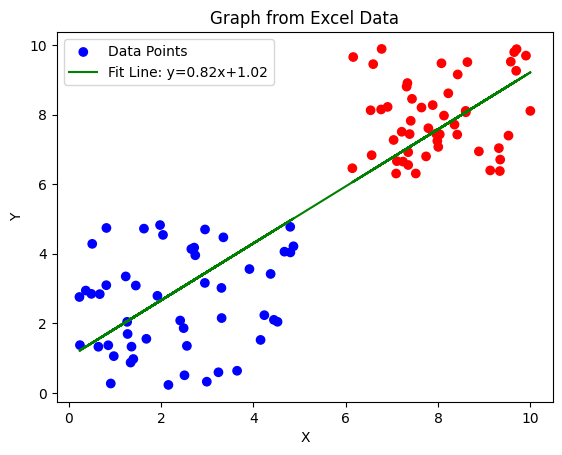

In [ ]:
import numpy as np
import pandas as pd

from random import randint
from matplotlib import pyplot as plt
from math import exp,log


x1 = np.random.uniform(0, 5, 50)
y1 = np.random.uniform(0, 5, 50)

x2 = np.random.uniform(6, 10, 50)
y2 = np.random.uniform(6, 10, 50)

data = {
    'x1': np.concatenate([x1, x2]),
    'y1': np.concatenate([y1, y2]),
    'class': [0]*50 + [1]*50
}
df = pd.DataFrame(data)
df.to_excel("data.xlsx", index=False)

plt.scatter(x=x1, y=y1, color='red')
plt.scatter(x=x2, y=y2, color='green')
plt.show()


inputs = [(x1[i], y1[i]) for i in range(len(x1))]
targets = [0 for i in range(len(x1))]
inputs += [(x2[i], y2[i]) for i in range(len(x2))]
targets += [1 for i in range(len(x2))]

weights = [randint(-100, 100) / 100 for _ in range(3)]

def weighted_z(point):
    z = [item * weights[i] for i, item in enumerate(point)]
    return sum(z) + weights[-1]

def logistic_function(z):
    return 1/(1 + exp(-z))

def logistic_error():
    errors = []

    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]

        if output == 1:
            output = 0.99999

        if output == 0:
            output = 0.00001

        error = -(target * log(output) - (1 - target) * log(1 - output))
        errors.append(error)

    return sum(errors) / len(errors)

lr = 0.1

for epoch in range(300):
    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]

        for j in range(len(weights) - 1):
            weights[j] -= lr * point[j] * (output - target) * (1 / len(inputs))

        weights[-1] -= lr * (output - target) * (1 / len(inputs))

    print(f"epoch: {epoch}, error: {logistic_error()}")

print(weights)

def test():
    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]
        print(f"output: {round(output, 2)}, target: {target}")
test()

def accuracy():
    true_outputs = 0

    for i, point in enumerate(inputs):
        z = weighted_z(point)
        output = logistic_function(z)
        target = targets[i]

        if round(output) == target:
            true_outputs += 1

    return true_outputs, len(inputs)

print("accuracy:", accuracy())

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("/content/data.xlsx")

plt.scatter(df['x1'], df['y1'], c=df['class'], cmap='bwr', label='Data Points')

m, b = np.polyfit(df['x1'], df['y1'], 1)
plt.plot(df['x1'], m*df['x1'] + b, color='green', label=f'Fit Line: y={m:.2f}x+{b:.2f}')

plt.title("Graph from Excel Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


